# Example 4
## from pyteomics documentation
https://pyteomics.readthedocs.io/en/latest/examples/example_annotation.html

In [2]:
from pyteomics import pylab_aux as pa, usi
import matplotlib.pyplot as plt
spectrum = usi.proxi(
    'mzspec:PXD004732:01650b_BC2-TUM_first_pool_53_01_01-3xHCD-1h-R2:scan:41840',
    'massive')
peptide = 'WNQLQAFWGTGK'

In [6]:
spectrum.keys()

dict_keys(['attributes', 'm/z array', 'intensity array', 'usi', 'status'])

In [9]:
spectrum["status"]

'READABLE'

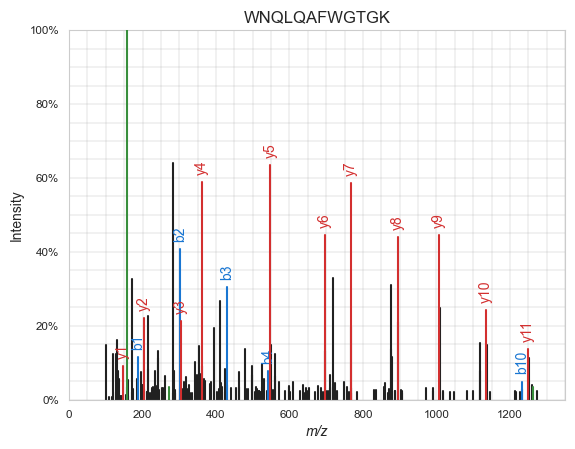

In [2]:
pa.annotate_spectrum(spectrum, peptide, precursor_charge=2, backend='spectrum_utils',
    ion_types='aby', title=peptide)
plt.show()

In [3]:
from pyteomics import mass
peptide = 'DLTDYLoxMK'  # oxidized methionine
aa_mass = mass.std_aa_mass.copy()
aa_mass['ox'] = 15.9949  # define the mass of the label

In [4]:
usi_top = 'mzspec:MSV000079960:DY_HS_Exp7-Ad1:scan:30372'
usi_bottom = 'mzspec:MSV000080679:j11962_C1orf144:scan:10671'

spectrum_top = usi.proxi(usi_top, 'massive')
spectrum_bottom = usi.proxi(usi_bottom, 'massive')

In [5]:
pa.mirror(spectrum_top, spectrum_bottom, peptide=peptide, precursor_charge=2,
    aa_mass=aa_mass, ion_types='aby', ftol=0.5, scaling='root',
    remove_precursor_peak=True, backend='spectrum_utils.iplot'
    ).properties(width=640, height=400).save('mirror.html')

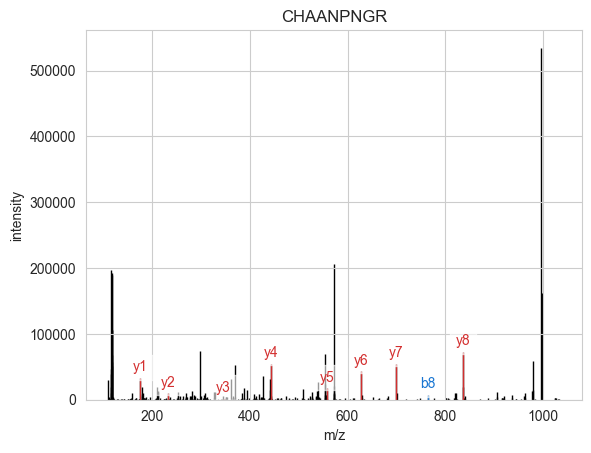

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from pyteomics import pylab_aux as pa

# Read spectrum data
spectrum_data = pd.read_csv(
    '../mass_spec_tsv_files/spec_guest_20250420-050520-325.tsv', sep='\t')
spectrum = {'m/z array': spectrum_data['m/z'].values, 'intensity array': spectrum_data['intensity'].values}
peptide = 'CHAANPNGR'
# 'CHAANPNGR'

# Use the 'matplotlib' backend instead of 'spectrum_utils'
pa.annotate_spectrum(spectrum, peptide, precursor_charge=2, backend='default',
    ion_types='aby', title=peptide)
plt.show()